In [1]:
import glob
import numpy as np
from numpy import inf
from scipy import stats as st
from PIL import Image
from matplotlib import pyplot as plt
import random
import pdb
import pandas as pd
import sys
import h5py
import os
import gc
import pickle

def load_triplet_table(loaded_path):
    with open(loaded_path, 'rb') as f:
        loaded_dict = pickle.load(f)
    return loaded_dict

def plot_triplet(triplet, file_list):
    image_ids = [triplet[0], triplet[1], triplet[2]]
    plt_titles = ['Root Images', 'Image 1', 'Image 2']
    # Show subplots | shape: (1,3) 
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
    for i, ax in enumerate(axs.flatten()):
        plt.sca(ax)
        plt.imshow(np.array(Image.open(file_list[image_ids[i]])))
        #plt.colorbar()
        plt.title(plt_titles[i])

    #plt.tight_layout()
    plt.suptitle('Triplet')
    plt.show()    

triplet_tables = load_triplet_table('saved_files/triplet_table.pkl')


# 1. Check if there exisits repetitive image in all triplets
# 2. Check if there is an empty bin (i.e., contain no triplet that satisfies the similarity) in the triplet table
def check_empty_and_repeat(triplet_table, num_tables=10, num_bins=10):
    empty_bin = [] # Determine an empty bin that has no triplet in the triplet table
    idx_counter = {} # Count image occurrence in the triplet table
    for i1 in range(1, num_bins+1): # Loop over layer1's bins
        for i2 in range(1, num_bins+1): # Loop over layer2's bins
            bin_name = "L1="+str(i1)+"_"+'L2='+str(i2)

            if bin_name in triplet_table:
                for triplet in triplet_table[bin_name]:
                    for img_num, idx in enumerate(triplet):
                        if idx in idx_counter:
                            if img_num == 0:
                                print("Found repetitive root image")
                            else:
                                print("Found repetitive images")
                            idx_counter[idx] += 1
                        else:
                            idx_counter[idx] = 1
            else:
                empty_bin.append(bin_name)
    return empty_bin, idx_counter

In [2]:
empty_bin, idx_counter = check_empty_and_repeat(triplet_tables)

In [3]:
empty_bin

['L1=2_L2=8',
 'L1=2_L2=9',
 'L1=2_L2=10',
 'L1=3_L2=9',
 'L1=4_L2=10',
 'L1=6_L2=7',
 'L1=6_L2=10',
 'L1=7_L2=9',
 'L1=7_L2=10',
 'L1=8_L2=8',
 'L1=8_L2=10',
 'L1=9_L2=6',
 'L1=9_L2=8',
 'L1=9_L2=10',
 'L1=10_L2=6']

In [4]:
triplet_tables["L1=1_L2=1"]

[(692, 542, 539),
 (135, 691, 132),
 (907, 762, 545),
 (737, 348, 757),
 (231, 190, 741),
 (509, 951, 705),
 (314, 98, 282),
 (739, 285, 138),
 (738, 956, 726),
 (288, 375, 264)]

#### Example 1: An image 1 and image 2 are similar to a root image in both IT (L1) and V2 (L2) layers

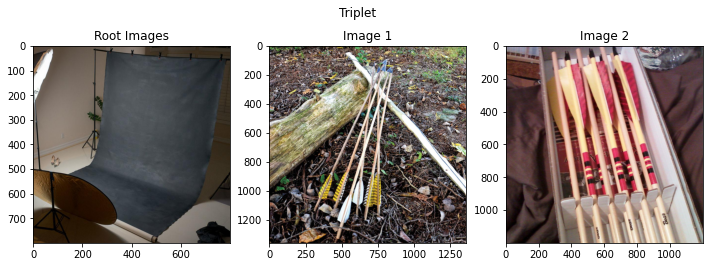

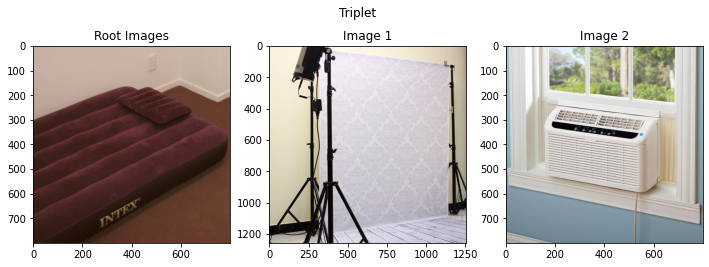

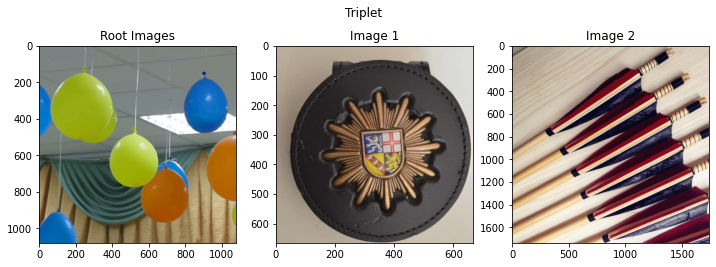

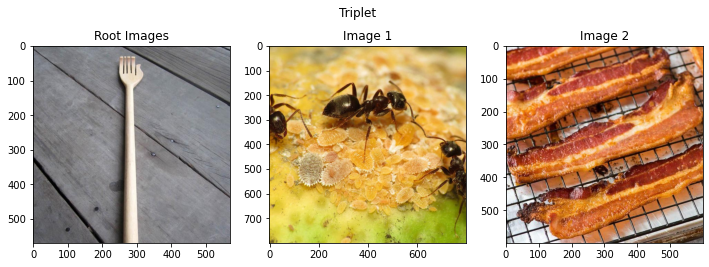

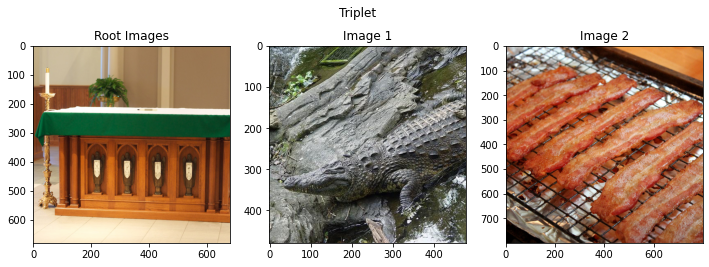

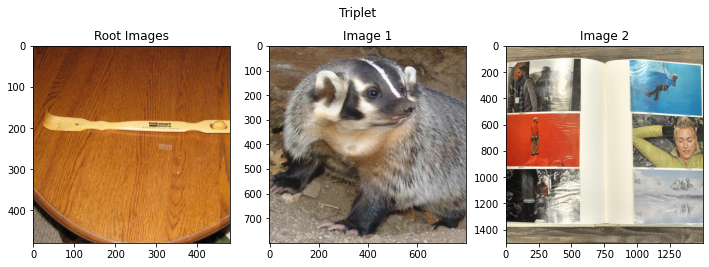

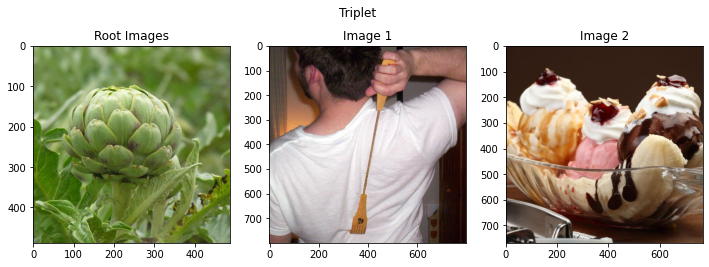

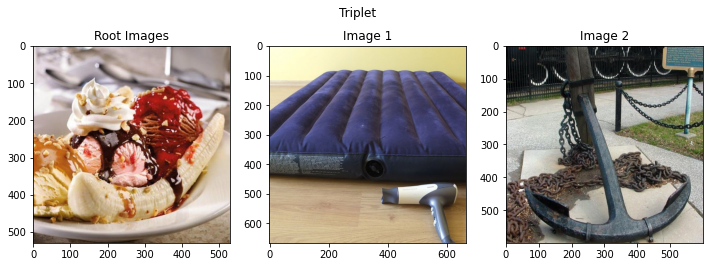

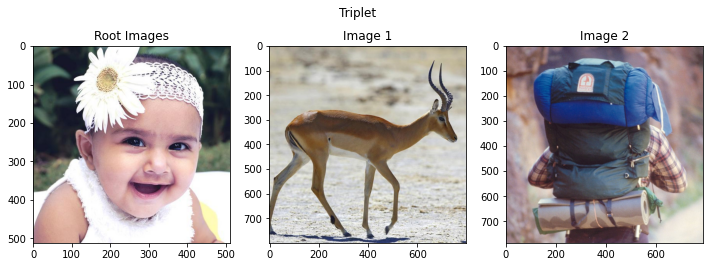

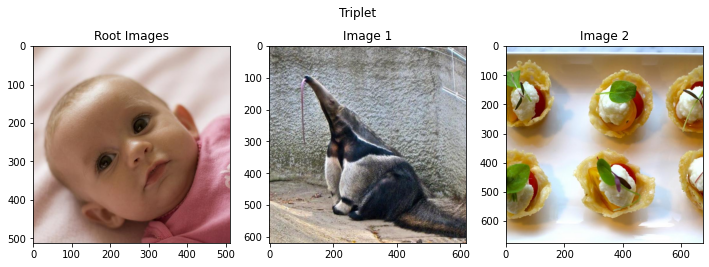

In [5]:
file_list = glob.glob('object_images/*/*.jpg')
plot_triplet(triplet_tables['L1=1_L2=1'][0], file_list)
plot_triplet(triplet_tables['L1=1_L2=1'][1], file_list)
plot_triplet(triplet_tables['L1=1_L2=1'][2], file_list)
plot_triplet(triplet_tables['L1=1_L2=1'][3], file_list)
plot_triplet(triplet_tables['L1=1_L2=1'][4], file_list)
plot_triplet(triplet_tables['L1=2_L2=1'][0], file_list)
plot_triplet(triplet_tables['L1=2_L2=1'][1], file_list)
plot_triplet(triplet_tables['L1=2_L2=1'][2], file_list)
plot_triplet(triplet_tables['L1=2_L2=1'][3], file_list)
plot_triplet(triplet_tables['L1=2_L2=1'][4], file_list)

#### Example 2: An image 1 and image 2 are similar to a root image in IT (L1) but distinct in V2 (L2) layers

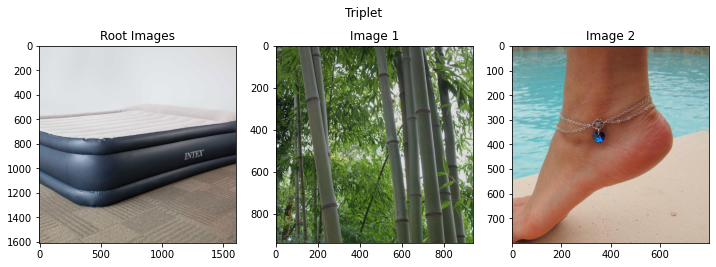

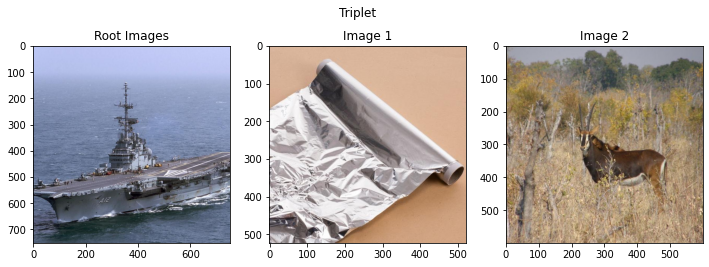

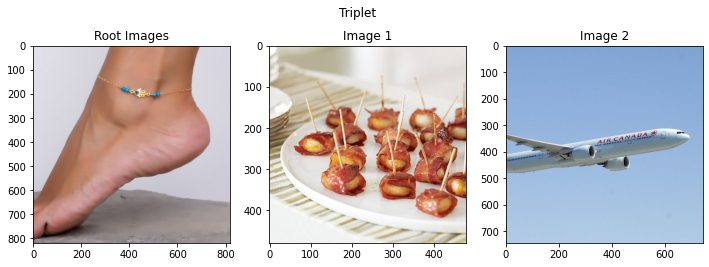

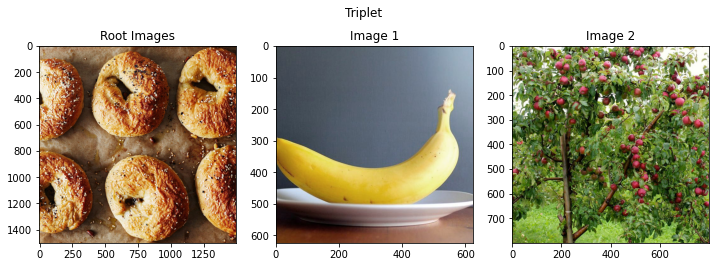

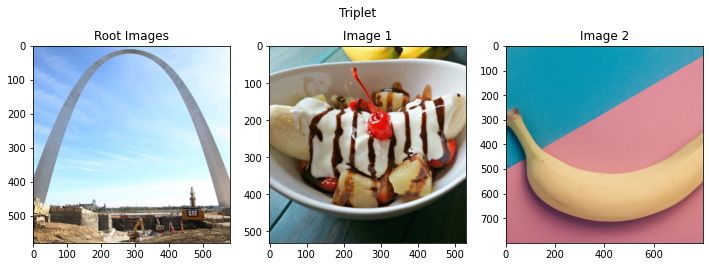

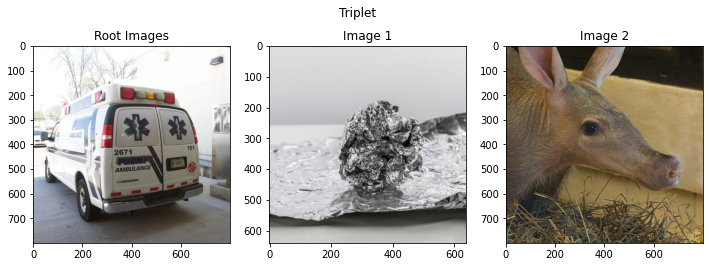

In [10]:
plot_triplet(triplet_tables['L1=1_L2=10'][0], file_list)
plot_triplet(triplet_tables['L1=1_L2=9'][0], file_list)
plot_triplet(triplet_tables['L1=1_L2=8'][0], file_list)
plot_triplet(triplet_tables['L1=1_L2=7'][0], file_list)
plot_triplet(triplet_tables['L1=2_L2=7'][0], file_list)
plot_triplet(triplet_tables['L1=1_L2=6'][0], file_list)

#### Example 3: An image 1 and image 2 are distinct to a root image in IT (L1) but similar in V2 (L2) layers

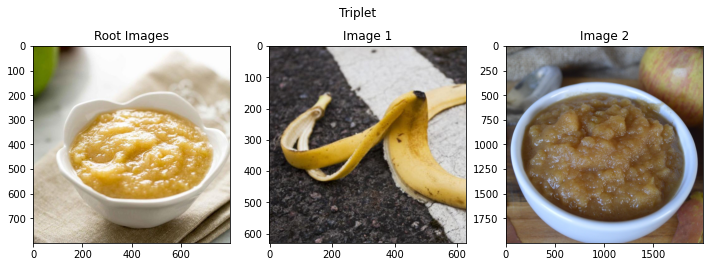

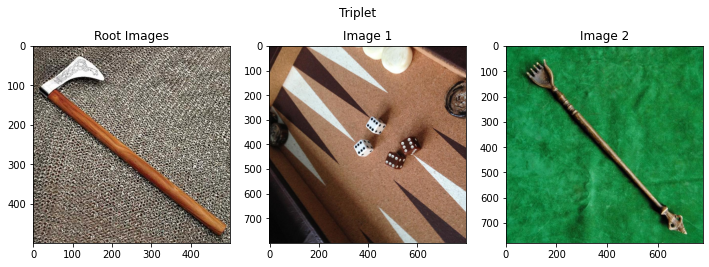

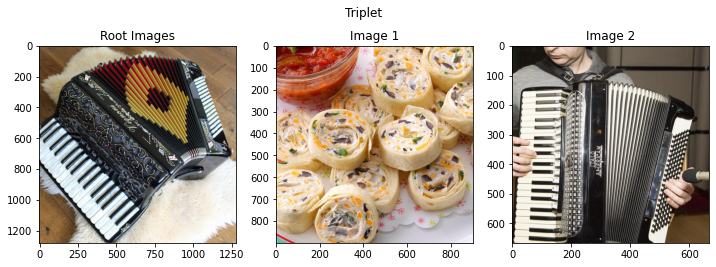

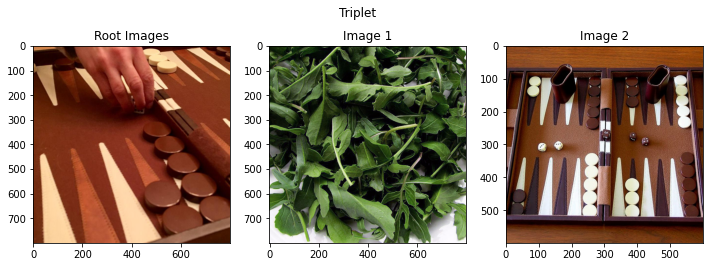

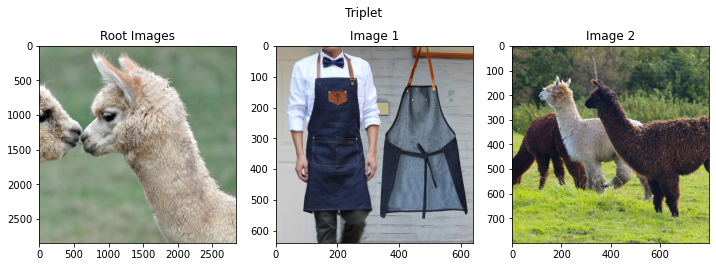

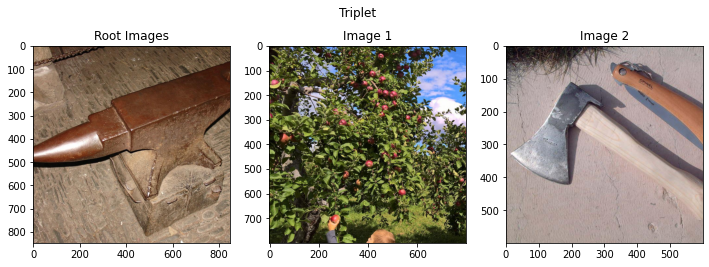

In [7]:
plot_triplet(triplet_tables['L1=10_L2=1'][0], file_list)
plot_triplet(triplet_tables['L1=10_L2=1'][1], file_list)
plot_triplet(triplet_tables['L1=10_L2=1'][2], file_list)
plot_triplet(triplet_tables['L1=9_L2=1'][0], file_list)
plot_triplet(triplet_tables['L1=9_L2=1'][1], file_list)
plot_triplet(triplet_tables['L1=9_L2=1'][2], file_list)

#### Example 4: An image 1 and image 2 are distinct to a root image in both IT (L1) and V2 (L2) layers

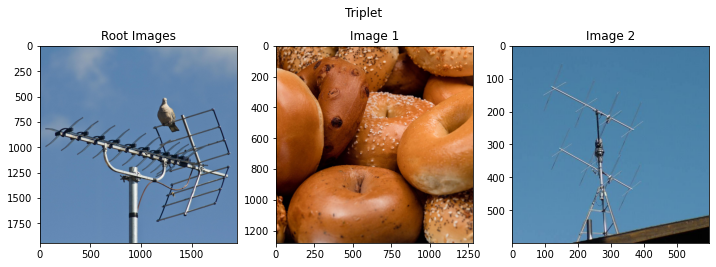

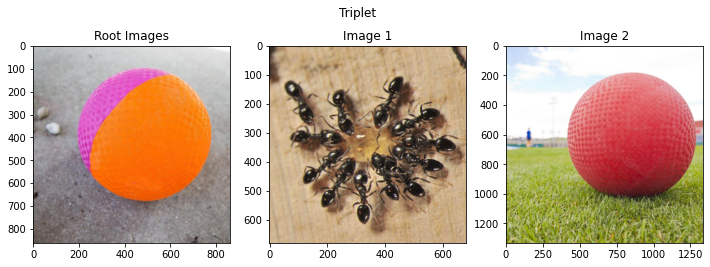

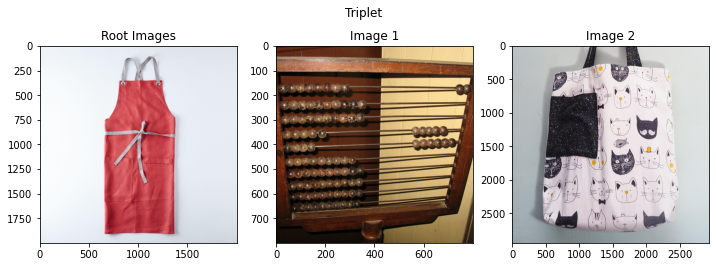

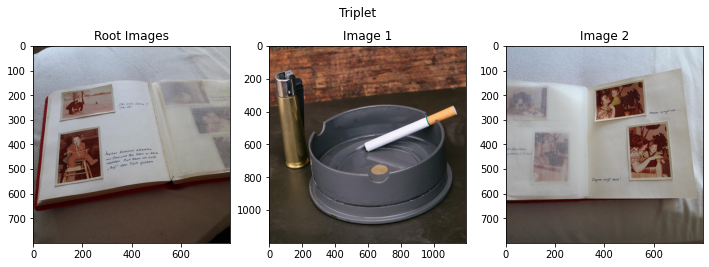

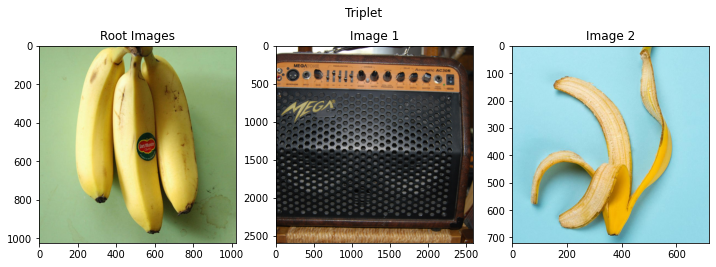

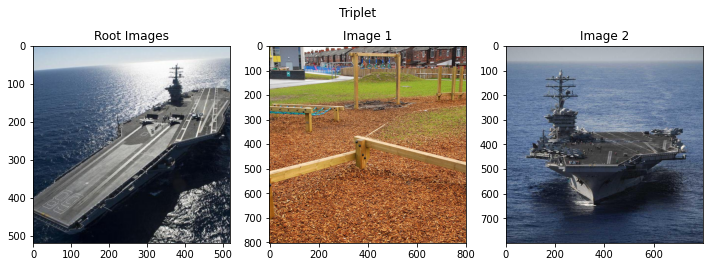

In [9]:
plot_triplet(triplet_tables['L1=10_L2=10'][0], file_list)
plot_triplet(triplet_tables['L1=10_L2=10'][1], file_list)
plot_triplet(triplet_tables['L1=10_L2=9'][0], file_list)
plot_triplet(triplet_tables['L1=10_L2=9'][1], file_list)
plot_triplet(triplet_tables['L1=9_L2=9'][0], file_list)
plot_triplet(triplet_tables['L1=8_L2=9'][0], file_list)